# 1. Correlação entre indicadores macroeconômicos

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from bcb import sgs

In [4]:
# 1. Criar df vazios
selic2 = pd.DataFrame()
confianca_consumidor2 = pd.DataFrame()
pib2 = pd.DataFrame()
incc2 = pd.DataFrame()
ipca2 = pd.DataFrame()
dolar2 = pd.DataFrame()

In [27]:
selic2['SELIC'] = sgs.get({'valor': 432}, start= "2015-01-01", end= "2022-12-31", freq= 'M')
confianca_consumidor2['CONFIANCA'] = sgs.get({'valor': 4393}, start= "2015-01-01", end= "2022-12-31", freq= 'M')
pib2['PIB'] = sgs.get({'valor': 4380}, start= "2015-01-01", end= "2022-12-31", freq= 'M')
ipca2['IPCA'] = sgs.get({'valor': 13522}, start= "2015-01-01", end= "2022-12-31", freq= 'M')
incc2['INCC'] = sgs.get({'valor': 192}, start= "2015-01-01", end= "2022-12-31", freq= 'M')
dolar2['DOLAR'] = sgs.get({'valor': 10813}, start= "2015-01-01", end= "2022-12-31", freq= 'M')

In [42]:
# Pela ausência do nasdaqdatalink, nem todos terão a mesma quantidade de dados
print(len(selic2), len(confianca_consumidor2), len(pib2), len(ipca2), len(incc2), len(dolar2))

2922 96 96 96 96 2006


In [43]:
macros_96 = pd.concat([confianca_consumidor2, pib2, ipca2, incc2], axis=1)
macros_96

,CONFIANCA,PIB,IPCA,INCC
Date,,,,
2015-01,112.69,474390.0,7.14,0.92
2015-02,112.89,466745.0,7.70,0.31
2015-03,106.86,515523.6,8.13,0.62
2015-04,101.56,497109.5,8.17,0.46
2015-05,91.77,492308.4,8.47,0.95
...,...,...,...,...
2022-08,106.76,873772.7,8.73,0.09
2022-09,111.46,857918.0,7.17,0.09
2022-10,114.23,880760.8,6.47,0.12


In [45]:
# Criar uma matriz de correlação

corr_macros = macros_96.corr()
corr_macros

,CONFIANCA,PIB,IPCA,INCC
CONFIANCA,1.000000,0.332602,-0.452705,-0.157292
PIB,0.332602,1.000000,0.232980,0.266987
IPCA,-0.452705,0.232980,1.000000,0.289942
INCC,-0.157292,0.266987,0.289942,1.000000


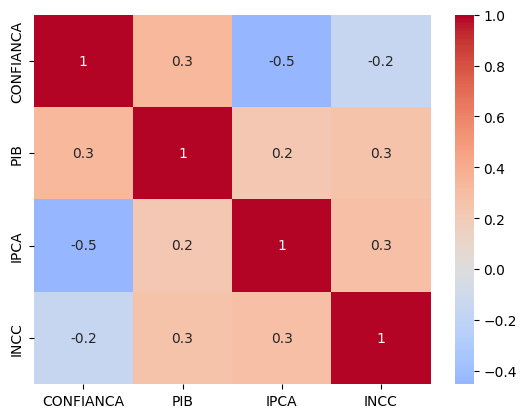

In [50]:
# Criar um heatmap (mapa de calor)

lista_macros = macros_96.columns

sns.heatmap(corr_macros, cmap= "coolwarm",
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);